In [1]:
import pandas as pd

## Import datasets

In [2]:
df_customers = pd.read_csv('../datasets/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('../datasets/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('../datasets/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('../datasets/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('../datasets/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('../datasets/olist_orders_dataset.csv')
df_products = pd.read_csv('../datasets/olist_products_dataset.csv')
df_sellers = pd.read_csv('../datasets/olist_sellers_dataset.csv')
df_product_category_name = pd.read_csv('../datasets/product_category_name_translation.csv')


<Axes: xlabel='review_score'>

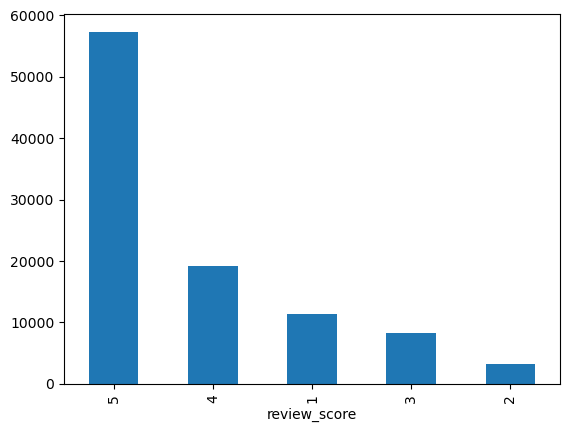

In [8]:
df_order_reviews['review_score'].value_counts().plot(kind='bar')

In [3]:
print(f"df_customers: {df_customers.shape}")
print(f"df_geolocation: {df_geolocation.shape}")
print(f"df_order_items: {df_order_items.shape}")
print(f"df_order_payments: {df_order_payments.shape}")
print(f"df_order_reviews: {df_order_reviews.shape}")
print(f"df_orders: {df_orders.shape}")
print(f"df_products: {df_products.shape}")
print(f"df_sellers: {df_sellers.shape}")
print(f"df_product_category_name: {df_product_category_name.shape}")

df_customers: (99441, 5)
df_geolocation: (1000163, 5)
df_order_items: (112650, 7)
df_order_payments: (103886, 5)
df_order_reviews: (99224, 7)
df_orders: (99441, 8)
df_products: (32951, 9)
df_sellers: (3095, 4)
df_product_category_name: (71, 2)


[![Image from Gyazo](https://i.gyazo.com/72f086a4361acdf88b86c88b801d4121.png)](https://gyazo.com/72f086a4361acdf88b86c88b801d4121)

## Merge

In [4]:
df_train = df_orders.merge(df_customers, on='customer_id', how='inner')
    # df_orders and df_customers have the same row count
df_train = df_train.merge(df_order_items, on='order_id', how='outer')
    # Order can have multiple items
df_train = df_train.merge(df_order_payments, on='order_id', how='outer')
    # Order can have multiple payments
df_train = df_train.merge(df_order_reviews, on='order_id', how='outer')
    # Order can have multiple reviews, while some orders may not have reviews
df_train = df_train.merge(df_products, on='product_id', how='left')
df_train = df_train.merge(df_product_category_name, on="product_category_name", how="inner")
df_train = df_train.merge(df_sellers, on='seller_id', how='left')
df_train.drop(columns=["product_category_name"], inplace=True)
    # We don't need Portuguese product category name

print(df_train.shape)

(116576, 39)


In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values

    return summary

resumetable(df_train)

Dataset Shape: (116576, 39)


,Name,dtypes,Missing,Uniques,First Value
0,order_id,object,0,97256,e481f51cbdc54678b7cc49136f2d6af7
1,customer_id,object,0,97256,9ef432eb6251297304e76186b10a928d
2,order_status,object,0,7,delivered
3,order_purchase_timestamp,object,0,96721,2017-10-02 10:56:33
4,order_approved_at,object,14,88964,2017-10-02 11:07:15
5,order_delivered_carrier_date,object,1213,79802,2017-10-04 19:55:00
6,order_delivered_customer_date,object,2515,94337,2017-10-10 21:25:13
7,order_estimated_delivery_date,object,0,450,2017-10-18 00:00:00
8,customer_unique_id,object,0,94088,7c396fd4830fd04220f754e42b4e5bff
9,customer_zip_code_prefix,int64,0,14927,3149


## EDA

In [6]:
# print df_order_reviews's order_id duplicates
print(df_order_reviews['order_id'].duplicated().sum())

551
